# Inflammation map

Get inflammation meta analysis map in HCP (or DK?)

Paper: https://www.sciencedirect.com/science/article/pii/S014976341730893X?via%3Dihub

Data: https://neurovault.org/collections/3234/

In [122]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
from gradientVersion import *
from pcaVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");

In [124]:
from nilearn.input_data import NiftiLabelsMasker

In [125]:
data_dir = "../data/parcellations/"
hcp_img = data_dir + "HCP-MMP_1mm.nii.gz"
mask = NiftiLabelsMasker(hcp_img, resampling_target='data')

In [127]:
img = "../data/inflammation/Activation_proportion.nii.gz"
# img = "../data/inflammation/Activation_FWE_extent_medium.nii.gz"
parcellated = mask.fit_transform(img).squeeze()

In [128]:
inflammation = (pd.DataFrame({'activation': parcellated})
                .set_axis([i+1 for i in range(360)])
                # .apply(lambda x: x-np.median(x))
                .join(get_labels_hcp())
                .rename({'label':'region'}, axis=1)
                .assign(hemi=lambda x:['left' if id<=180 else 'right' for id in x.index])
               )

array([[<AxesSubplot:title={'center':'activation'}>]], dtype=object)

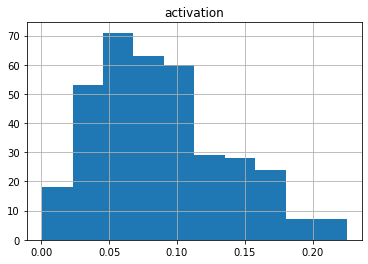

In [129]:
inflammation.hist()

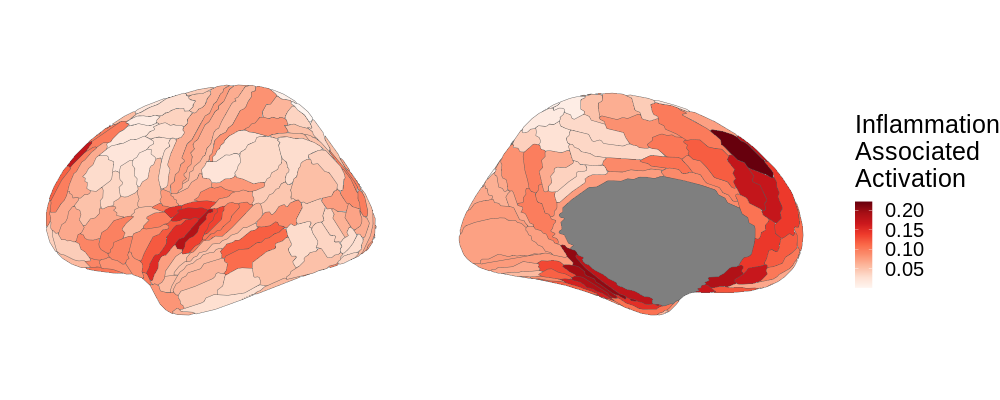

In [134]:
%%R -i inflammation -w 1000 -h 400
ggplot(inflammation, aes(fill=activation)) + 
geom_brain(atlas=glasser, aes(geometry=geometry, hemi=hemi, side=side, type=type), hemi='left') +
scale_fill_gradientn(colors=brewer.reds(100), name='Inflammation\nAssociated\nActivation') +
theme_void() + theme(text=element_text(size=25))
# scale_fill_gradientn(colors=rev(brewer.rdbu(100)[1:60]))

Add inflammation?

In [262]:
(get_inflammation_data()[:180]
 .set_index('region').drop('hemi',axis=1)
 # .apply(lambda x: (x-np.mean(x))/np.std(x))
 .rename({'activation':'Inflammation-Associated Activation'},axis=1)
 .to_csv("../data/inflammation/inflammation_activation.csv")
)
maps = pd.read_csv("../data/inflammation/inflammation_activation.csv", index_col=0)

In [263]:
maps = maps.clip(lower=.05)

In [292]:
# maps = (get_inflammation_data("../data/inflammation/Activation_FWE_extent_medium.nii.gz")[:180]
# maps = (get_inflammation_data("../data/inflammation/Activation_FWE_design_observational_only.nii.gz")[:180]
maps = (get_inflammation_data("../data/inflammation/Activation_FWE_design_experimental_only.nii.gz")[:180]
# maps = (get_inflammation_data("../data/inflammation_network_regions.nii.gz")[:180]
 .set_index('region').drop('hemi',axis=1)
 # .apply(lambda x: (x-np.mean(x))/np.std(x))
 .rename({'activation':'Inflammation-Associated Activation'},axis=1)
 # .to_csv("../data/inflammation_activation.csv")
)
# maps = pd.read_csv("../data/inflammation_activation.csv", index_col=0)

In [308]:
ddir = "../data/inflammation/"
inflame_dict = {
    '% voxels activated (no thresholding)':'Activation_proportion.nii.gz',
    'FWE significant voxels, observational only':'Activation_FWE_design_observational_only.nii.gz',
    'FWE significant voxels, experimental only':'Activation_FWE_design_experimental_only.nii.gz'
}

inflame_dict = {k:get_inflammation_data(ddir+file)[:180] 
                for k,file in inflame_dict.items()}

In [313]:
inflame_maps = (pd.concat(inflame_dict).unstack(0).droplevel(0,axis=1)
)
inflame_maps

,% voxels activated (no thresholding),"FWE significant voxels, observational only","FWE significant voxels, experimental only"
label,,,
V1,0.073362,0.000566,0.000000
MST,0.039446,0.000000,0.000000
V6,0.063272,0.000000,0.000000
V2,0.077299,0.002472,0.003952
V3,0.068430,0.007407,0.000000
V4,0.056704,0.017257,0.000000
V8,0.077430,0.096491,0.000000
4,0.064586,0.000000,0.000000
3b,0.065663,0.000000,0.000000


In [283]:
# dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
# dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')
# pca_hcp_3d_ds8 = gradientVersion(approach='pca').fit('hcp_3donors_ds8')
scores = dm_hcp_ds9.clean_scores(flips=[0]).set_index('label')

In [284]:
scores = scores.clip(lower=0)

In [370]:
(get_corrs(scores, inflame_maps, method='pearson').T
 .style
 .set_table_styles([{
    'selector': 'tr',
    'props': [('background-color', '#ffffff'), ('color','black')]
}])
)

,% voxels activated (no thresholding),"FWE significant voxels, observational only","FWE significant voxels, experimental only"
G1,0.478763,0.476473,0.306168
G2,0.281825,0.160808,0.265049
G3,0.089275,0.016410,-0.007878


<AxesSubplot:xlabel='G3', ylabel='Inflammation-Associated Activation'>

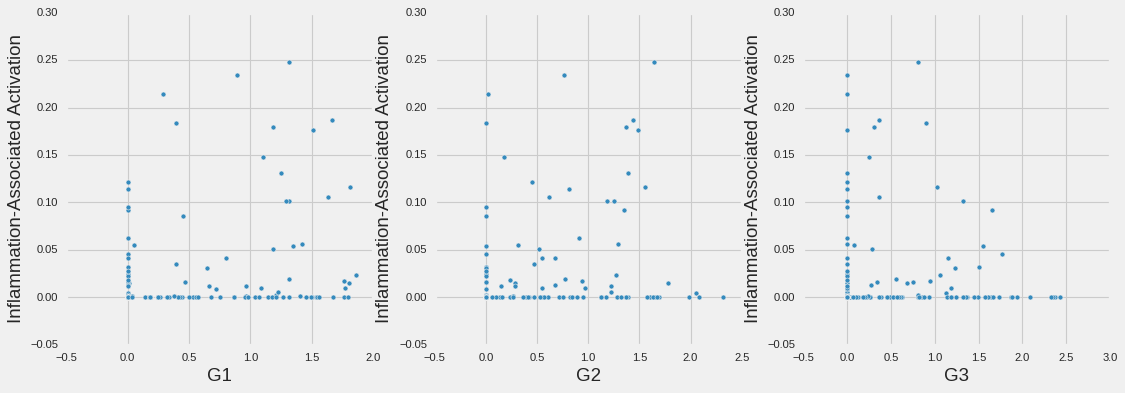

In [368]:
# pd.set_option('display.max_rows', 500)
# scores.join(maps).loc[lambda x: x['Inflammation-Associated Activation']>0].plot.scatter(2,3)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axs = plt.subplots(1,3, figsize=(15,5))
scores.join(maps).plot.scatter(0,3, ax=axs[0])
scores.join(maps).plot.scatter(1,3, ax=axs[1])
scores.join(maps).plot.scatter(2,3, ax=axs[2])


In [295]:
get_corrs(scores, maps, method='spearman')

,G1,G2,G3
Inflammation-Associated Activation,0.351179,0.30234,0.060628


In [296]:
scores_plot = scores.reset_index().assign(version='')
# inflame_plot = inflame_maps.reset_index().set_axis(['version','label','activation'

In [318]:
inflame_maps.min()

% voxels activated (no thresholding)          0.000566
FWE significant voxels, observational only    0.000000
FWE significant voxels, experimental only     0.000000
dtype: float64

In [379]:
%R brewer.rdbu(100)[48:52]

'#F8EFEA','#F7F2EF','#F7F5F4','#F5F6F6','#F1F4F5'


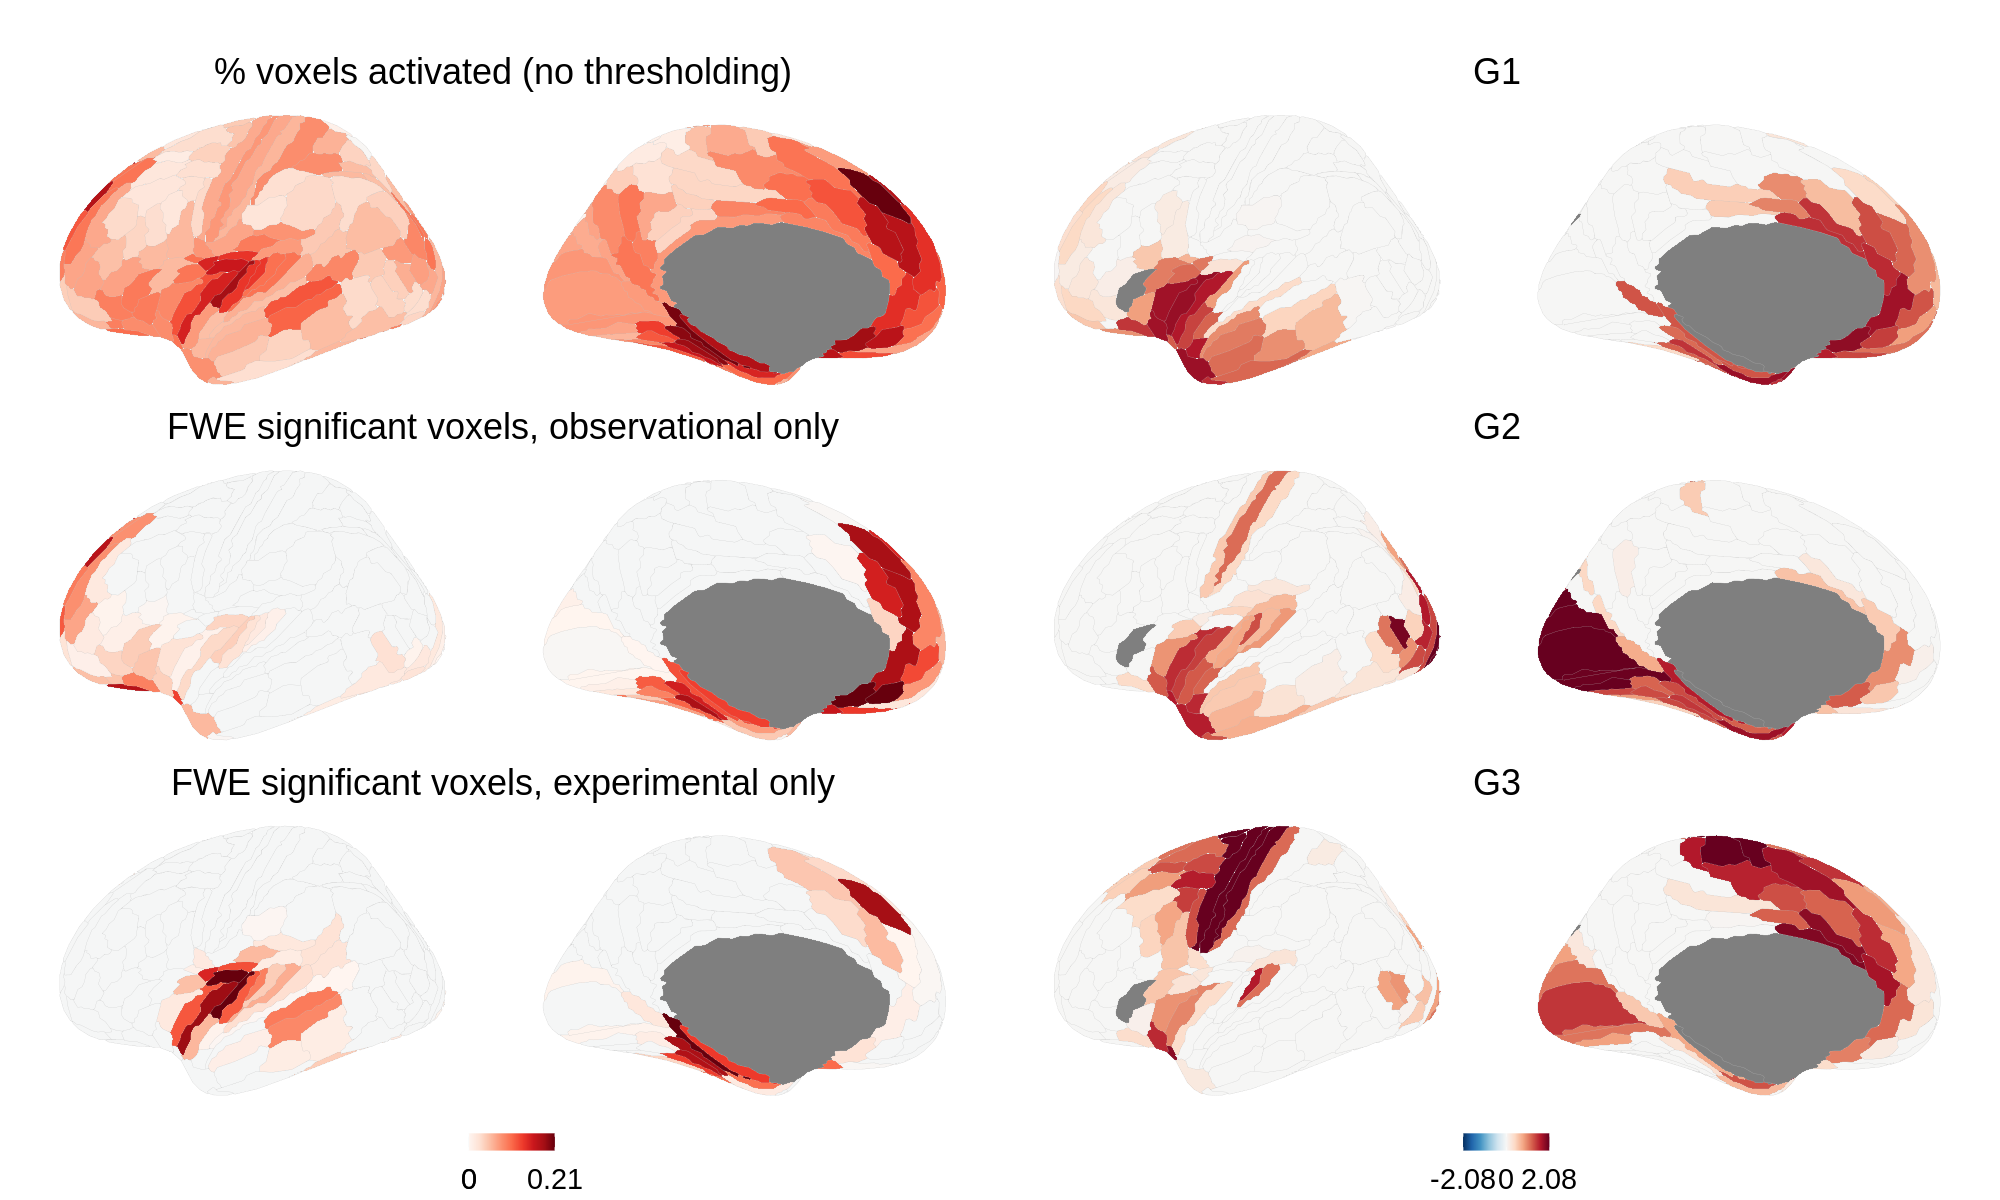

In [380]:
%%R -i inflame_maps -i scores_plot -w 2000 -h 1200
source("../code/plot_maps.R")

p1 <- plot_maps(inflame_maps, ncol=1, colors=c('#F5F6F6', brewer.reds(100)), zero=T)
p2 <- plot_hcp(scores_plot) + facet_wrap(~component, ncol=1)

(p1 | p2) & theme(text=element_text(size=36), legend.position='bottom', 
                  strip.text.x=element_text(size=36)
                 )